In [37]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [38]:
# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

In [39]:
# For simplicity, use only two classes (binary classification) and two features
X = X[y != 2, :2]  # Taking only two features
y = y[y != 2]
y = np.where(y == 0, -1, 1)  # Map classes to -1 and 1 for SVM

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [43]:
# Train the SVM model
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


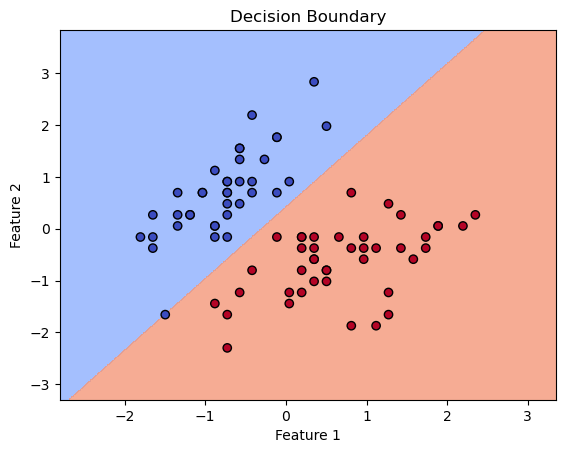

In [44]:
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Flatten the grid to get predictions for each point
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training data
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[-1, 0, 1], cmap='coolwarm', linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary for the training data
plot_decision_boundary(X_train, y_train, svm)
